## Importing The Needed Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import idx2numpy
from scipy import optimize
import gzip
import PIL

## Importing The Data

In [2]:
data = os.getcwd() + "\\Data"
test_images = idx2numpy.convert_from_string(gzip.open(data + "\\t10k-images-idx3-ubyte.gz").read())
test_labels = idx2numpy.convert_from_string(gzip.open(data + "\\t10k-labels-idx1-ubyte.gz").read())
train_images= idx2numpy.convert_from_string(gzip.open(data + "\\train-images-idx3-ubyte.gz").read())
train_labels= idx2numpy.convert_from_string(gzip.open(data + "\\train-labels-idx1-ubyte.gz").read())

## Vizualising The Data

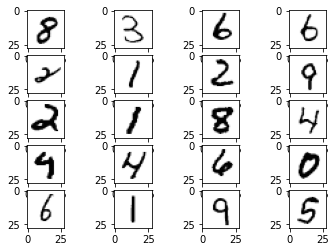

[[8 3 6 6]
 [2 1 2 9]
 [2 1 8 4]
 [9 4 6 0]
 [6 1 9 5]]


In [3]:
rands = np.random.randint(0,6000,20)
for i in range(len(rands)):
    plt.subplot(5,4,i+1)
    plt.imshow(train_images[rands[i]],cmap = "Greys") 
plt.show()
print(train_labels[rands].reshape(5,4))

## Defining The Needed Functions

In [11]:
def g(z):
    return 1/(1+np.exp(-z))
def sigmoid_gradient(z):
    return g(z) * (1-g(z))

## Normalizing The Data

In [5]:
X= train_images
X = X.reshape(60000,28*28) 
X = (X/255 -0.5) * 2

## Transforming The Label Vector To A Label Matrix

In [6]:
Y = []
eye =  np.eye(10)
for i in train_labels:
    Y.append(eye[i])
Y = np.array(Y)

## Initialization Of Random Weights

In [4]:
def randweight(shape,epsilon):
    return (np.random.rand(shape[0]*shape[1])*2*epsilon - epsilon).reshape(shape)

In [5]:
hidden_layer_size = 128

In [9]:
Theta_1_Shape = (hidden_layer_size,785)
Theta_2_Shape = (10,hidden_layer_size+1)
Theta_1 = randweight(Theta_1_Shape,1/np.power(10,4))
Theta_2 = randweight(Theta_2_Shape,1/np.power(10,4))
Parameters = np.concatenate([Theta_1.ravel(),Theta_2.ravel()])
costs = []

## Cost And Backpropogation

In [1]:
def J(params,X,Y,lambda_,hidden_layer_size):
    ## FEEDFORWARD AND COST
    global costs
    t1 = params[0:785*hidden_layer_size].reshape(hidden_layer_size,785)
    t2 = params[785*hidden_layer_size::].reshape(10,hidden_layer_size+1)
    j = 0
    a1 = np.insert(X,0,1,axis = 1)
    z2 = a1@t1.T
    a2 = np.insert(g(z2),0,1,axis = 1) 
    z3 = a2@t2.T
    a3 = g(z3)
    m = len(X)
    for i in range(m):
        for k in range(10):
            j+= -Y[i][k] * np.log(a3[i][k]) - (1-Y[i][k])*np.log(1-a3[i][k])
    reg = lambda_/(2*m)*(np.sum(t1[::,1:]**2) +np.sum(t2[::,1:]**2))
    ## BACKPROPOGATION AND GRADIENT
    d3 = a3 - Y
    d2 = (t2[::,1:].T@d3.T).T*sigmoid_gradient(z2)
    D1 = d2.T@a1
    D2 = d3.T@a2
    Q1 = t1.copy()
    Q2 = t2.copy()
    grad = np.concatenate([D1.ravel(), D2.ravel()])/m
    Q1[0,:] = 0
    Q2[0,:] = 0
    gradreg =  np.concatenate([(Q1*lambda_/m).ravel(),(Q2*lambda_/m).ravel()])
    costs.append(j/m + reg)
    return j/m + reg,grad + gradreg

## Optimizing Parameters

In [ ]:
hidden_layer_size = 128
lambda_ = 1
cost = lambda p: J(p,X,Y,lambda_,hidden_layer_size)
Theta_1_Shape = (hidden_layer_size,785)
Theta_2_Shape = (10,hidden_layer_size+1)
Theta_1 = randweight(Theta_1_Shape,0.12)
Theta_2 = randweight(Theta_2_Shape,0.12)
Parameters = np.concatenate([Theta_1.ravel(),Theta_2.ravel()])
res = optimize.minimize(cost,
                    Parameters,
                    jac=True,
                    method='TNC')
params = res.x

## Plotting The Cost Graph

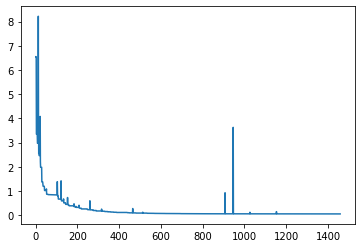

In [8]:
plt.plot(np.add(range(len(costs)),1), costs)

## Accuracy Of Prediction In Training Set

In [7]:
params = np.load("Parameters.npy")

In [8]:
t1 = params[0:785*128].reshape(128,785)
t2 = params[785*128:].reshape(10,129)
X=train_images.reshape(60000,28*28)
X = (X/255 -0.5) * 2

In [12]:
a1 = np.insert(X,0,1,axis = 1)
z2 = a1@t1.T
a2 = np.insert(g(z2),0,1,axis = 1) 
z3 = a2@t2.T
a3 = g(z3)

In [13]:
h = np.argmax(a3,axis =1)

In [14]:
print("Accuracy:",sum(h==train_labels)/len(X)*100)

Accuracy: 100.0


## Accuracy Of Prediction In Test Set

In [15]:
X = (test_images / 255 - 0.5)*2

In [16]:
a1 = np.insert(X.reshape(10000,28*28),0,1,axis = 1)
z2 = a1@t1.T
a2 = np.insert(g(z2),0,1,axis = 1) 
z3 = a2@t2.T
a3 = g(z3)

In [17]:
h = np.argmax(a3,axis = 1)
print("Accuracy:",sum(h == test_labels) / len(test_labels) *100)

Accuracy: 97.68
